In [3]:
import pandas as pd
    
path_to_data = '..\datasets\housing\housing.csv'

df = pd.read_csv(path_to_data)

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
from matplotlib import pyplot as plt

In [5]:
telecom_data = pd.read_csv("telecom_churn.csv")

In [6]:
telecom_data

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [10]:
len(telecom_data)

3333

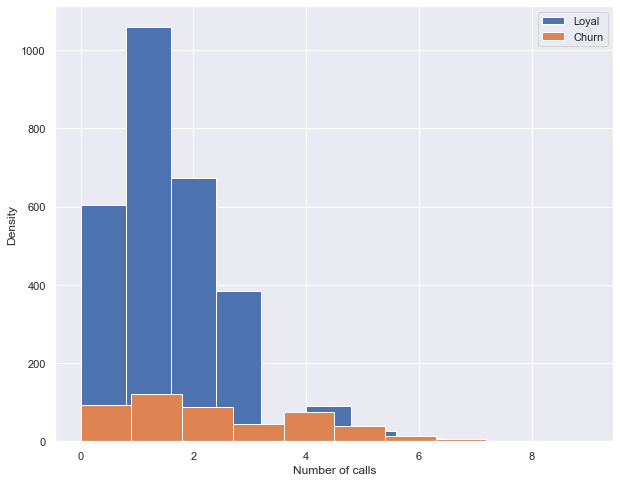

In [8]:
plt.figure(figsize=(10, 8))
telecom_data.loc[telecom_data["Churn"] == False, "Customer service calls"].hist(
    label="Loyal"
)
telecom_data.loc[telecom_data["Churn"] == True, "Customer service calls"].hist(
    label="Churn"
)
plt.xlabel("Number of calls")
plt.ylabel("Density")
plt.legend();

In [9]:
telecom_data["Churn"].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

In [22]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples


def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2.0, 100 * (1 - alpha / 2.0)])
    return boundaries

In [12]:
# Save the data about the loyal and former customers to split the dataset
loyal_calls = telecom_data.loc[
    telecom_data["Churn"] == False, "Customer service calls"
].values
churn_calls = telecom_data.loc[
    telecom_data["Churn"] == True, "Customer service calls"
].values

In [13]:
loyal_calls.shape, churn_calls.shape

((2850,), (483,))

In [14]:
# Set the seed for reproducibility of the results
np.random.seed(0)

In [23]:
# Generate the samples using bootstrapping and calculate the mean for each of them
loyal_mean_scores = [
    np.mean(sample) for sample in get_bootstrap_samples(loyal_calls, 1000)
]
churn_mean_scores = [
    np.mean(sample) for sample in get_bootstrap_samples(churn_calls, 1000)
]

In [29]:
loyal_mean_scores.sort()

In [30]:
loyal_mean_scores

[1.3712280701754387,
 1.3926315789473684,
 1.3954385964912281,
 1.3964912280701753,
 1.3985964912280702,
 1.4003508771929825,
 1.4014035087719299,
 1.4021052631578947,
 1.4024561403508773,
 1.4028070175438596,
 1.4028070175438596,
 1.4028070175438596,
 1.403859649122807,
 1.404561403508772,
 1.4049122807017544,
 1.4049122807017544,
 1.4049122807017544,
 1.4052631578947368,
 1.4059649122807019,
 1.4063157894736842,
 1.4066666666666667,
 1.4066666666666667,
 1.4073684210526316,
 1.407719298245614,
 1.4080701754385965,
 1.4080701754385965,
 1.4080701754385965,
 1.4087719298245613,
 1.4087719298245613,
 1.4094736842105262,
 1.4101754385964913,
 1.4119298245614036,
 1.4119298245614036,
 1.412280701754386,
 1.412280701754386,
 1.412280701754386,
 1.4126315789473685,
 1.4129824561403508,
 1.4129824561403508,
 1.4129824561403508,
 1.4136842105263159,
 1.4140350877192982,
 1.4143859649122807,
 1.4143859649122807,
 1.414736842105263,
 1.4150877192982456,
 1.4154385964912282,
 1.4154385964912282,

In [26]:
# Print the resulting interval estimates
print(
    "Service calls from loyal: mean interval", stat_intervals(loyal_mean_scores, 0.05)
)
print(
    "Service calls from churn: mean interval", stat_intervals(churn_mean_scores, 0.05)
)

Service calls from loyal: mean interval [1.40807018 1.49404386]
Service calls from churn: mean interval [2.07650104 2.40791925]


In [28]:
get_bootstrap_samples(loyal_calls, 1000).shape

(1000, 2850)

Next example from here - https://scikit-learn.org/stable/auto_examples/ensemble/plot_bias_variance.html#sphx-glr-auto-examples-ensemble-plot-bias-variance-py

Tree: 0.0255 (error) = 0.0003 (bias^2)  + 0.0152 (var) + 0.0098 (noise)
Bagging(Tree): 0.0196 (error) = 0.0004 (bias^2)  + 0.0092 (var) + 0.0098 (noise)


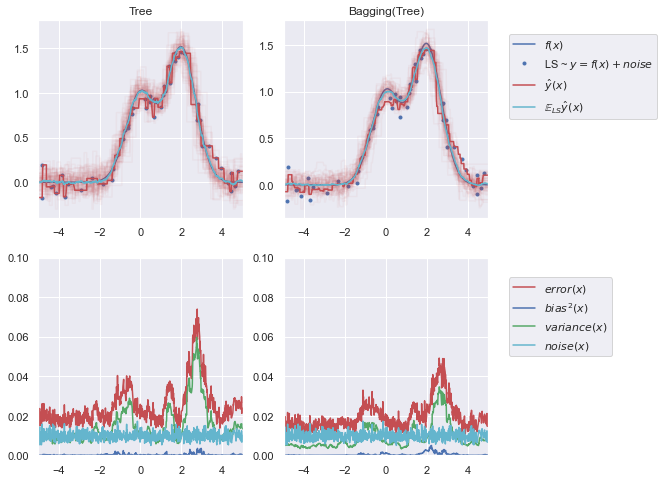

In [31]:
# Author: Gilles Louppe <g.louppe@gmail.com>
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Settings
n_repeat = 50  # Number of iterations for computing expectations
n_train = 50  # Size of the training set
n_test = 1000  # Size of the test set
noise = 0.1  # Standard deviation of the noise
np.random.seed(0)

# Change this for exploring the bias-variance decomposition of other
# estimators. This should work well for estimators with high variance (e.g.,
# decision trees or KNN), but poorly for estimators with low variance (e.g.,
# linear models).
estimators = [
    ("Tree", DecisionTreeRegressor()),
    ("Bagging(Tree)", BaggingRegressor(DecisionTreeRegressor())),
]

n_estimators = len(estimators)


# Generate data
def f(x):
    x = x.ravel()

    return np.exp(-(x**2)) + 1.5 * np.exp(-((x - 2) ** 2))


def generate(n_samples, noise, n_repeat=1):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X)

    if n_repeat == 1:
        y = f(X) + np.random.normal(0.0, noise, n_samples)
    else:
        y = np.zeros((n_samples, n_repeat))

        for i in range(n_repeat):
            y[:, i] = f(X) + np.random.normal(0.0, noise, n_samples)

    X = X.reshape((n_samples, 1))

    return X, y


X_train = []
y_train = []

for i in range(n_repeat):
    X, y = generate(n_samples=n_train, noise=noise)
    X_train.append(X)
    y_train.append(y)

X_test, y_test = generate(n_samples=n_test, noise=noise, n_repeat=n_repeat)

plt.figure(figsize=(10, 8))

# Loop over estimators to compare
for n, (name, estimator) in enumerate(estimators):
    # Compute predictions
    y_predict = np.zeros((n_test, n_repeat))

    for i in range(n_repeat):
        estimator.fit(X_train[i], y_train[i])
        y_predict[:, i] = estimator.predict(X_test)

    # Bias^2 + Variance + Noise decomposition of the mean squared error
    y_error = np.zeros(n_test)

    for i in range(n_repeat):
        for j in range(n_repeat):
            y_error += (y_test[:, j] - y_predict[:, i]) ** 2

    y_error /= n_repeat * n_repeat

    y_noise = np.var(y_test, axis=1)
    y_bias = (f(X_test) - np.mean(y_predict, axis=1)) ** 2
    y_var = np.var(y_predict, axis=1)

    print(
        "{0}: {1:.4f} (error) = {2:.4f} (bias^2) "
        " + {3:.4f} (var) + {4:.4f} (noise)".format(
            name, np.mean(y_error), np.mean(y_bias), np.mean(y_var), np.mean(y_noise)
        )
    )

    # Plot figures
    plt.subplot(2, n_estimators, n + 1)
    plt.plot(X_test, f(X_test), "b", label="$f(x)$")
    plt.plot(X_train[0], y_train[0], ".b", label="LS ~ $y = f(x)+noise$")

    for i in range(n_repeat):
        if i == 0:
            plt.plot(X_test, y_predict[:, i], "r", label=r"$\^y(x)$")
        else:
            plt.plot(X_test, y_predict[:, i], "r", alpha=0.05)

    plt.plot(X_test, np.mean(y_predict, axis=1), "c", label=r"$\mathbb{E}_{LS} \^y(x)$")

    plt.xlim([-5, 5])
    plt.title(name)

    if n == n_estimators - 1:
        plt.legend(loc=(1.1, 0.5))

    plt.subplot(2, n_estimators, n_estimators + n + 1)
    plt.plot(X_test, y_error, "r", label="$error(x)$")
    plt.plot(X_test, y_bias, "b", label="$bias^2(x)$"),
    plt.plot(X_test, y_var, "g", label="$variance(x)$"),
    plt.plot(X_test, y_noise, "c", label="$noise(x)$")

    plt.xlim([-5, 5])
    plt.ylim([0, 0.1])

    if n == n_estimators - 1:
        plt.legend(loc=(1.1, 0.5))

plt.subplots_adjust(right=0.75)
plt.show()